In [3]:
# import necessary libraries 

# For Data Analysis
import pandas as pd 
import numpy as np

 # Data Visualisation 
import matplotlib.pyplot as plt
import seaborn as sns 

# Data Pre-Processing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Classifier Libraries (Machine Learning Algorithms)
from sklearn.linear_model import SGDClassifier     
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
!pip install xgboost                                     
from xgboost import XGBClassifier              
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB    
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier  

# Evaluation Metrics 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

import warnings 
warnings.filterwarnings('ignore')


# Heart Disease Predictions using Supervised Learning

- Objective 

Build a machine-learning model that can predict the likelihood of a person having a heart disease based on the given features.


In [4]:
# Load dataset

df = pd.read_csv(r"C:\Users\hp\Desktop\10Alytics\Python\Machine Learning\Machine Learning WMDIV 22-10-23\Heart Disease prediction using ML\heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Feature in the dataset and meaning
- age age in years,
- sex-(1=male; 0 = female),
- cp-chest pain type (1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic),
- trestbps-resting blood pressure(in mm Hg on admission to the hospital),
- chol- serum cholestoral in mg/dl,
- fbs-(fasting blood sugar> 120 mg/dl)(1=true; 0 = false),
- restecg-resting electrocardiographic results,
- thalach-maximum heart rate achieved, 
- exang-exercise-induced angina(1=yes; 0 = no)
- oldpeak- ST depression induced by exercise relative to rest,
- slope- the slope of the peak exercise ST segment,
- ca-number of major vessels(0-3) colored by flourosopy, 
- thal-3=normal; 6=fixed defect; 7= reversable defect
- target- have disease or not (1 = yes; 0 = no)
   

In [5]:
# For a better understanding and flow of analysis, I will rename some of the columns
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_suga', 'rest_ecg', 'max_heart_rate_achieved','exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessel', 'thalassemia', 'target']
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_suga,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessel,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
# Data verification - Data type, number of features and rows, missing data, etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_pain_type          303 non-null    int64  
 3   resting_blood_pressure   303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_suga       303 non-null    int64  
 6   rest_ecg                 303 non-null    int64  
 7   max_heart_rate_achieved  303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    int64  
 11  num_major_vessel         303 non-null    int64  
 12  thalassemia              303 non-null    int64  
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

In [7]:
# Statistical Analysis of the data
df.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_suga,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessel,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_suga         0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessel           0
thalassemia                0
target                     0
dtype: int64


<Axes: >

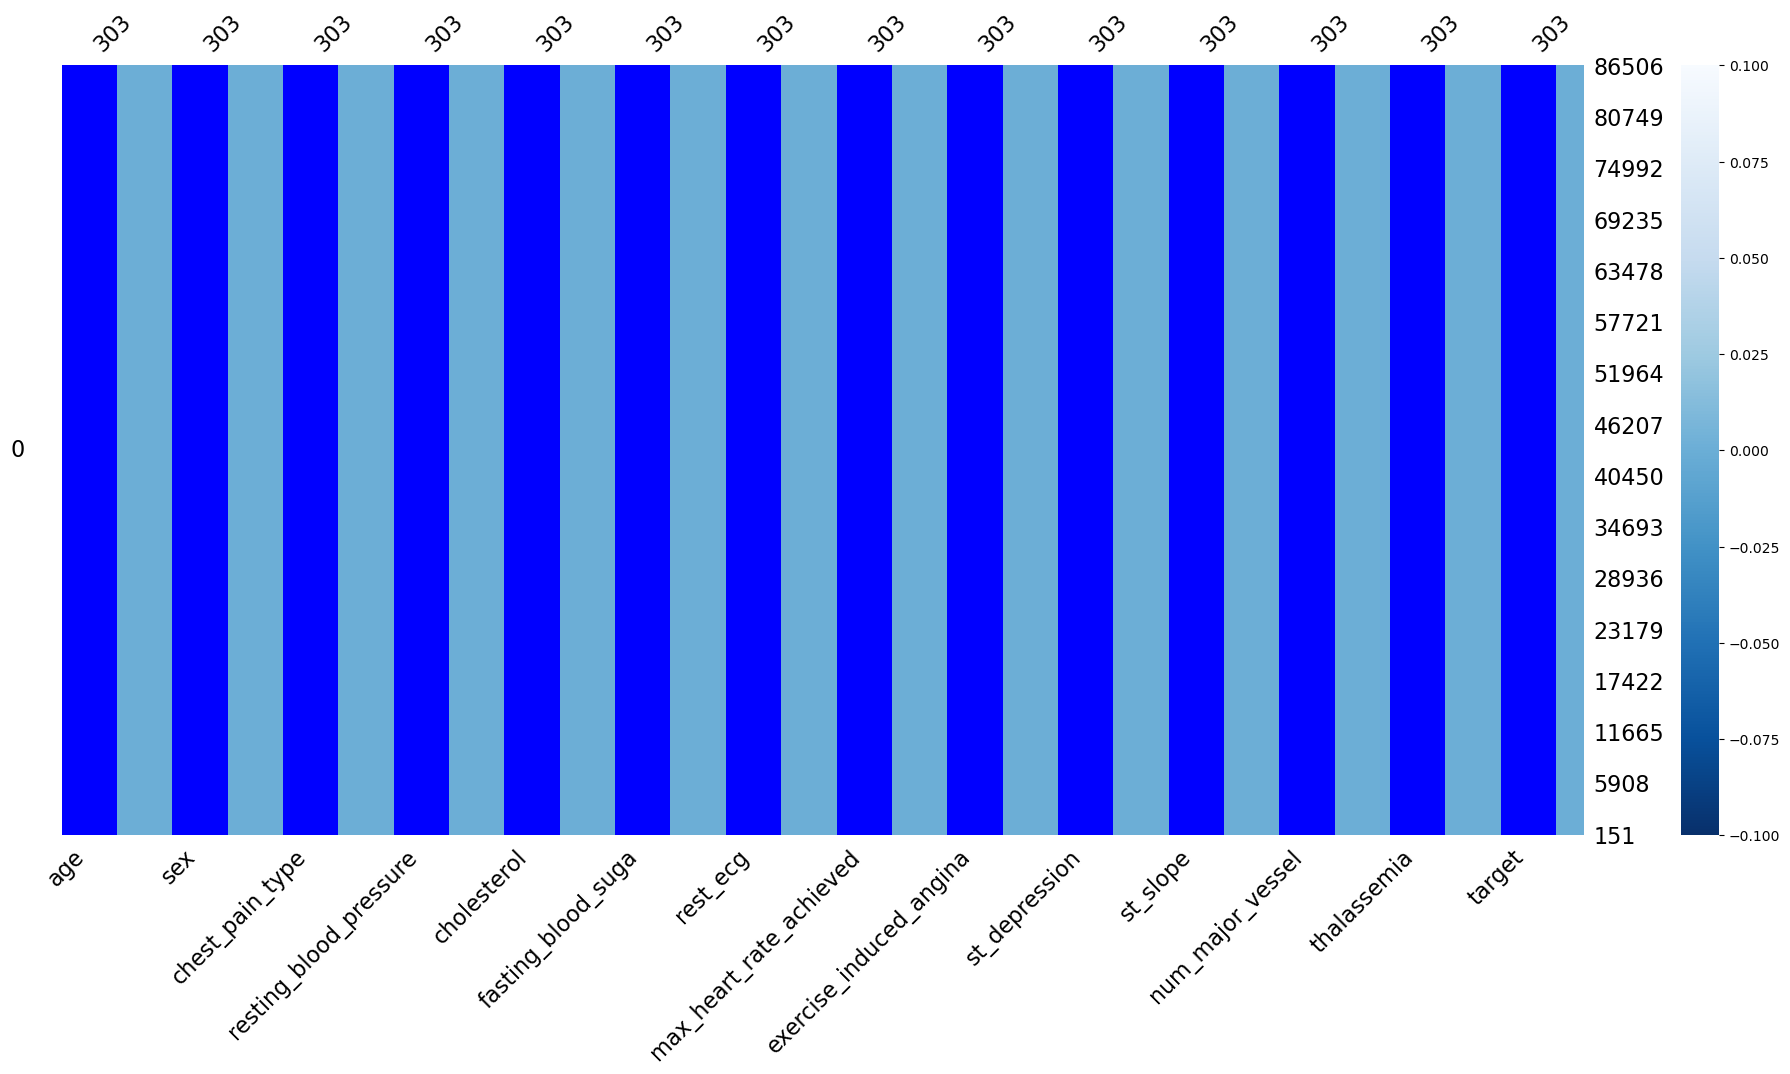

In [8]:
# Check for missing values
print(df.isnull().sum())

# Visualise the missing data
plt.figure(figsize = (10,3))
sns.heatmap(df.isnull(), cbar=True, cmap="Blues_r")

import missingno as msno
msno.bar(df, color='blue')

## Exploratory Data Analysis
- Univariate Analysis 


In [9]:
# Show the categorical Features - Initially the dataset has no categorical variable but I created them 
cat_feat = df.select_dtypes('object').columns.to_list()
cat_feat

[]

In [10]:
# Show the numerical features
num_feat = df.select_dtypes(np.number).columns.to_list()
num_feat

['age',
 'sex',
 'chest_pain_type',
 'resting_blood_pressure',
 'cholesterol',
 'fasting_blood_suga',
 'rest_ecg',
 'max_heart_rate_achieved',
 'exercise_induced_angina',
 'st_depression',
 'st_slope',
 'num_major_vessel',
 'thalassemia',
 'target']

In [11]:
df.columns 

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_suga', 'rest_ecg',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessel', 'thalassemia', 'target'],
      dtype='object')

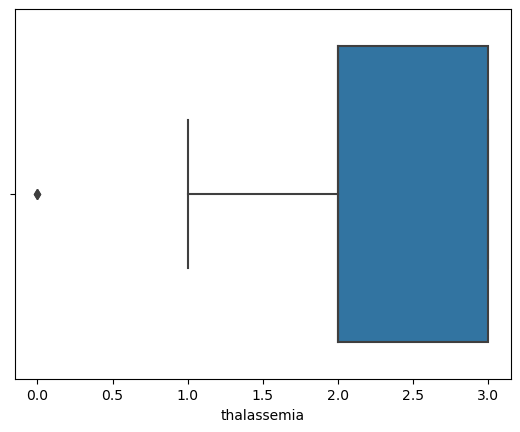

In [12]:
# Check for outliers 
sns.boxplot(x=df["thalassemia"]);

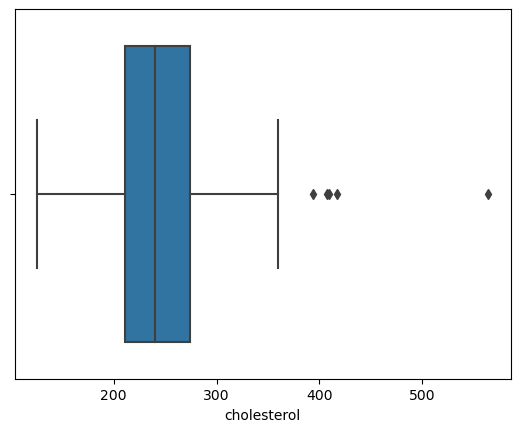

In [13]:
# Check for outliers 
sns.boxplot(x=df["cholesterol"]);

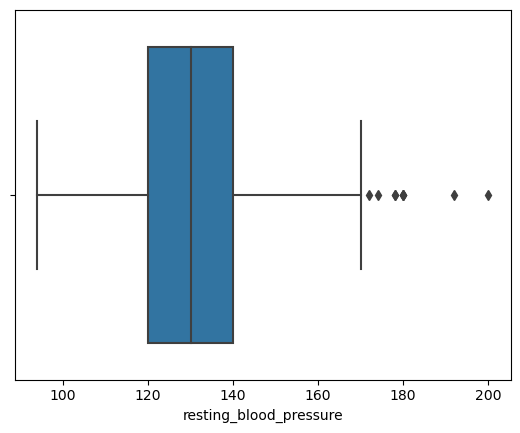

In [14]:
# Check for outliers 
sns.boxplot(x=df["resting_blood_pressure"]);

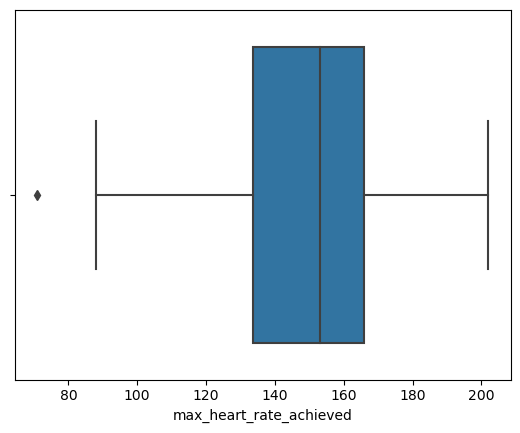

In [15]:
# Check for outliers 
sns.boxplot(x=df["max_heart_rate_achieved"]);

In [16]:
import pandas as pd

# Find the minimum and maximum age
min_age = df['age'].min()
max_age = df['age'].max()

print("Minimum age:", min_age)
print("Maximum age:", max_age)


Minimum age: 29
Maximum age: 77


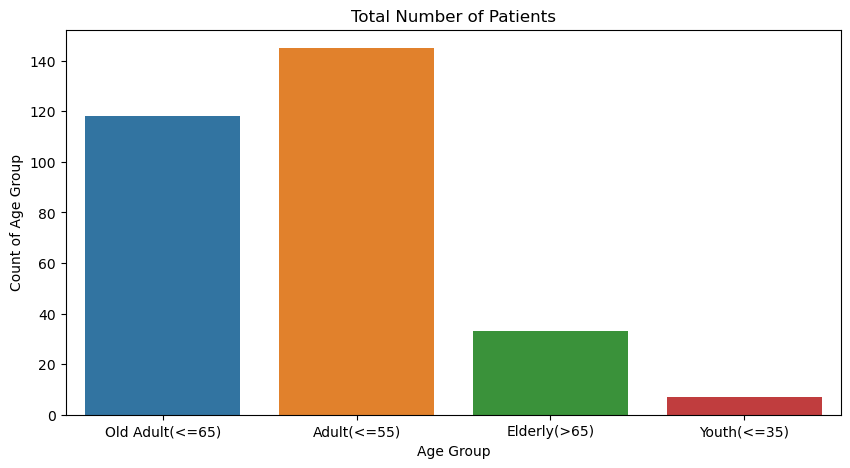

In [62]:
# Data Visualisation
# Age_Bracket 

def age_bracket(age):
    if age <= 35:
        return "Youth(<=35)"
    elif age <= 55:
        return "Adult(<=55)"
    elif age <= 65:
        return "Old Adult(<=65)"
    else:
        return "Elderly(>65)"

df["age_bracket"] = df["age"].apply(age_bracket)
    
# Investigating the age bracket of patients
plt.figure(figsize = (10,5))
sns.countplot(x = "age_bracket", data = df)
plt.xlabel("Age Group")
plt.ylabel("Count of Age Group")
plt.title("Total Number of Patients");

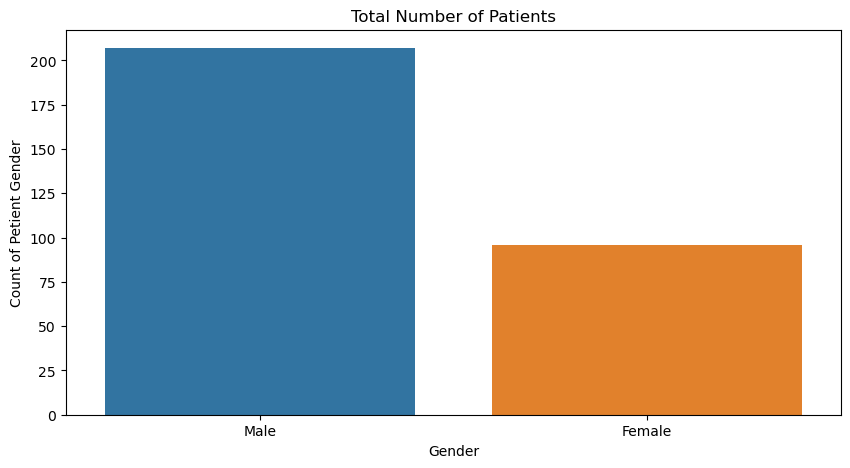

In [18]:
# Data Visualisation 
# Sex

def gender(sex):
    if sex == 1:
        return "Male"
    else:
        return "Female"

df["gender"] = df["sex"].apply(gender)
    
# Investigating the gender of patients  
plt.figure(figsize = (10,5))
sns.countplot(x = "gender", data = df)
plt.xlabel("Gender")
plt.ylabel("Count of Petient Gender")
plt.title("Total Number of Patients");

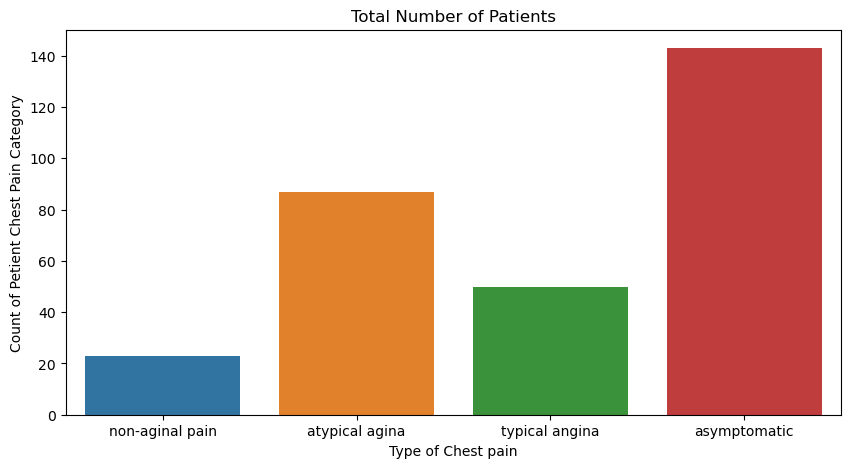

In [19]:
# Data Visualisation 
# chest_pain type (1: typical angina, 2: atypical agina, 3: non-aginal pain, 4: asymptomatic)

def chest_pain(cp):
    if cp ==1:
        return "typical angina"
    elif cp ==2:
        return "atypical agina"
    elif cp ==3:
        return "non-aginal pain"
    else:
        return "asymptomatic"
    
df["cp_cat"] = df["chest_pain_type"].apply(chest_pain)

# Investigating the Chest Pain of patients  
plt.figure(figsize = (10,5))
sns.countplot(x = "cp_cat", data = df)
plt.xlabel("Type of Chest pain")
plt.ylabel("Count of Petient Chest Pain Category")
plt.title("Total Number of Patients");  

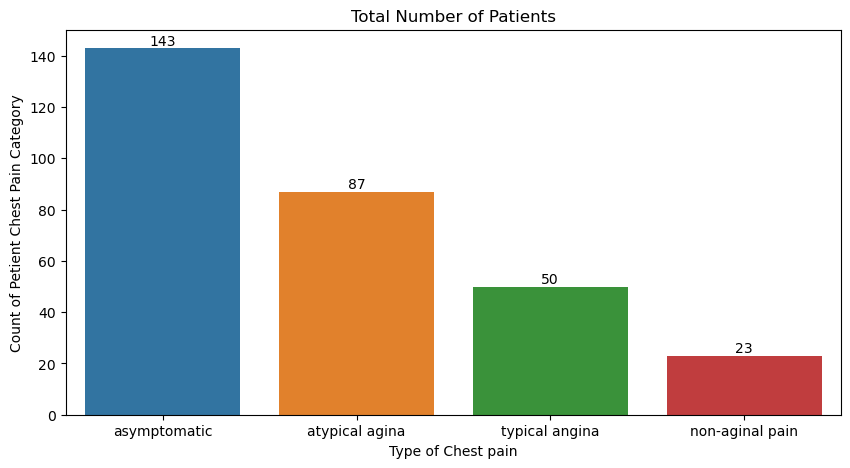

In [20]:
# Data Visualisation 
# chest_pain type (1: typical angina, 2: atypical agina, 3: non-aginal pain, 4: asymptomatic)

def chest_pain(cp):
    if cp ==1:
        return "typical angina"
    elif cp ==2:
        return "atypical agina"
    elif cp ==3:
        return "non-aginal pain"
    else:
        return "asymptomatic"
    
df["cp_cat"] = df["chest_pain_type"].apply(chest_pain)

# Investigating the Chest Pain of patients 
plt.figure(figsize = (10,5))

ax = sns.countplot(x=df["cp_cat"], order=df["cp_cat"].value_counts(ascending = False).index)
# sns.countplot(y = "cp_cat", data = df)
values = df["cp_cat"].value_counts(ascending = False).values
ax.bar_label(container=ax.containers[0], labels = values);

plt.xlabel("Type of Chest pain")
plt.ylabel("Count of Petient Chest Pain Category")
plt.title("Total Number of Patients"); 


Yes    165
No     138
Name: label, dtype: int64


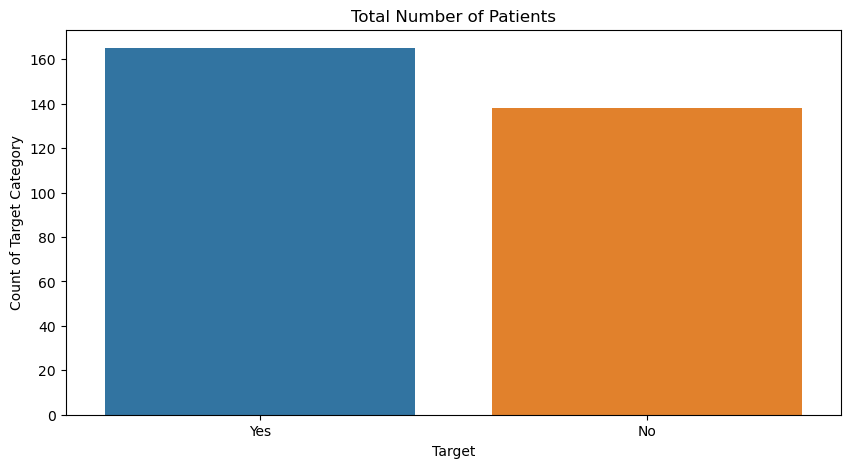

In [21]:
# Data Visualisation 
# target - have disease or not (1=yes, 0 = no)

def label(tg):
    if tg == 1:
        return "Yes"
    else:
        return "No"
    
df["label"] = df['target'].apply(label)

# Total Patient in each catgory
print(df["label"].value_counts())

# Investigate the target
plt.figure(figsize = (10,5))
sns.countplot(x = "label", data = df)
plt.xlabel("Target")
plt.ylabel("Count of Target Category")
plt.title("Total Number of Patients");  

# Bivariate Analysis 

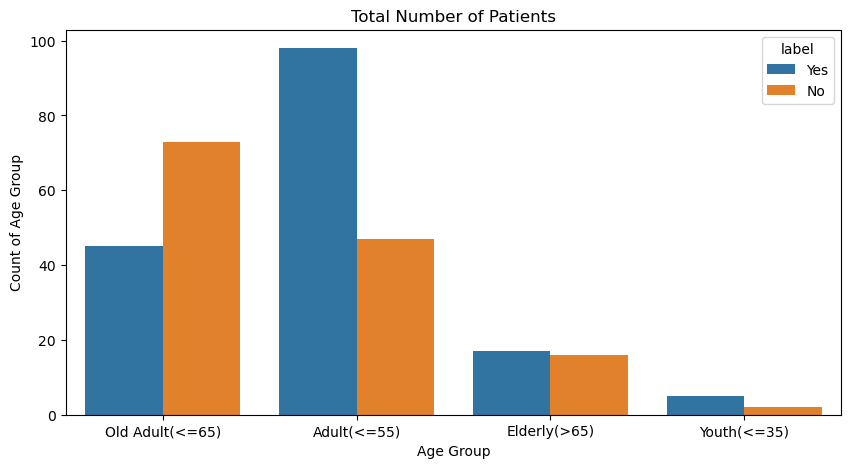

In [22]:
# Investigating the age group of patients by the target feature

plt.figure(figsize = (10,5))
sns.countplot(x = "age_bracket", data = df, hue = "label")
plt.xlabel("Age Group")
plt.ylabel("Count of Age Group")
plt.title("Total Number of Patients");

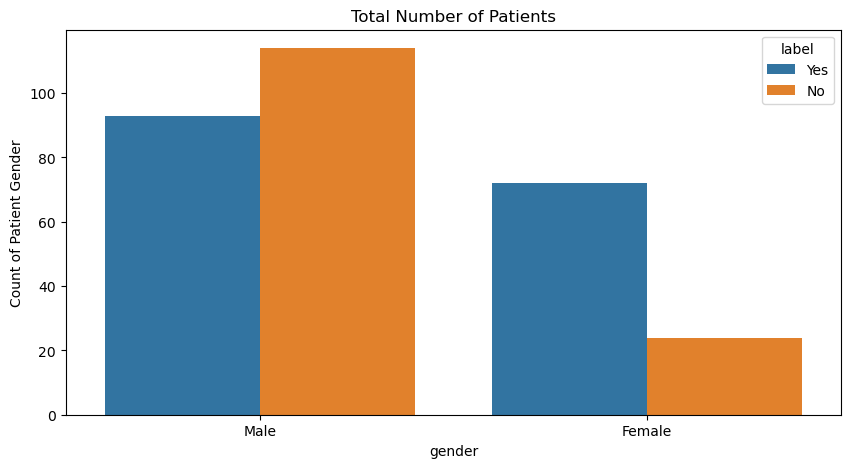

In [23]:
# Investigating the gender of patients by the target feature

plt.figure(figsize = (10,5))
sns.countplot(x = "gender", data = df, hue = "label")
plt.xlabel("gender")
plt.ylabel("Count of Patient Gender")
plt.title("Total Number of Patients");

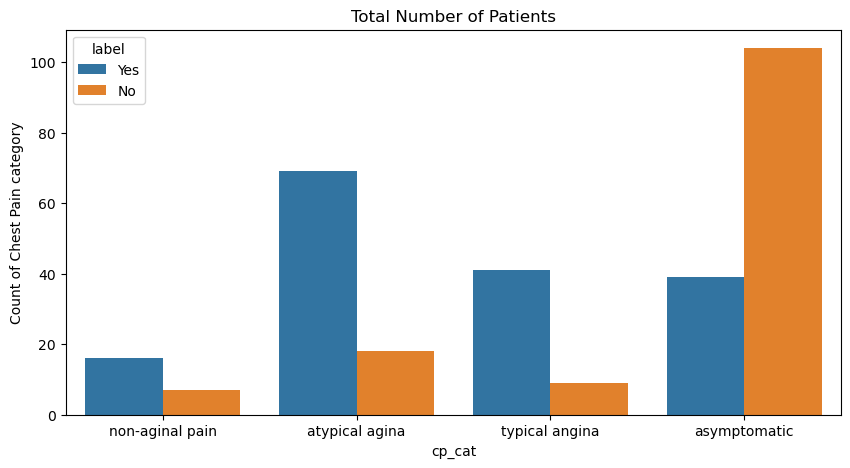

In [24]:
# Investigating the Chest Pain category of patients by the target feature

plt.figure(figsize = (10,5))
sns.countplot(x = "cp_cat", data = df, hue = "label")
plt.xlabel("cp_cat")
plt.ylabel("Count of Chest Pain category")
plt.title("Total Number of Patients");

# Narrations 

In [25]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_suga', 'rest_ecg',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessel', 'thalassemia', 'target', 'age_bracket',
       'gender', 'cp_cat', 'label'],
      dtype='object')

In [26]:
df.nunique()

age                         41
sex                          2
chest_pain_type              4
resting_blood_pressure      49
cholesterol                152
fasting_blood_suga           2
rest_ecg                     3
max_heart_rate_achieved     91
exercise_induced_angina      2
st_depression               40
st_slope                     3
num_major_vessel             5
thalassemia                  4
target                       2
age_bracket                  4
gender                       2
cp_cat                       4
label                        2
dtype: int64

In [27]:
# Show the categorical Features 
cat_feat = df.select_dtypes('object').columns.to_list()
cat_feat

['age_bracket', 'gender', 'cp_cat', 'label']

In [28]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_suga,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessel,thalassemia,target,age_bracket,gender,cp_cat,label
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Old Adult(<=65),Male,non-aginal pain,Yes
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adult(<=55),Male,atypical agina,Yes
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Adult(<=55),Female,typical angina,Yes
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Old Adult(<=65),Male,typical angina,Yes
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Old Adult(<=65),Female,asymptomatic,Yes


# Multivariate Analysis
Multivariate analysis involves analysing the relationship between 3 or more variables. 

## Exploratory Data Analysis - Multivariate Analysis

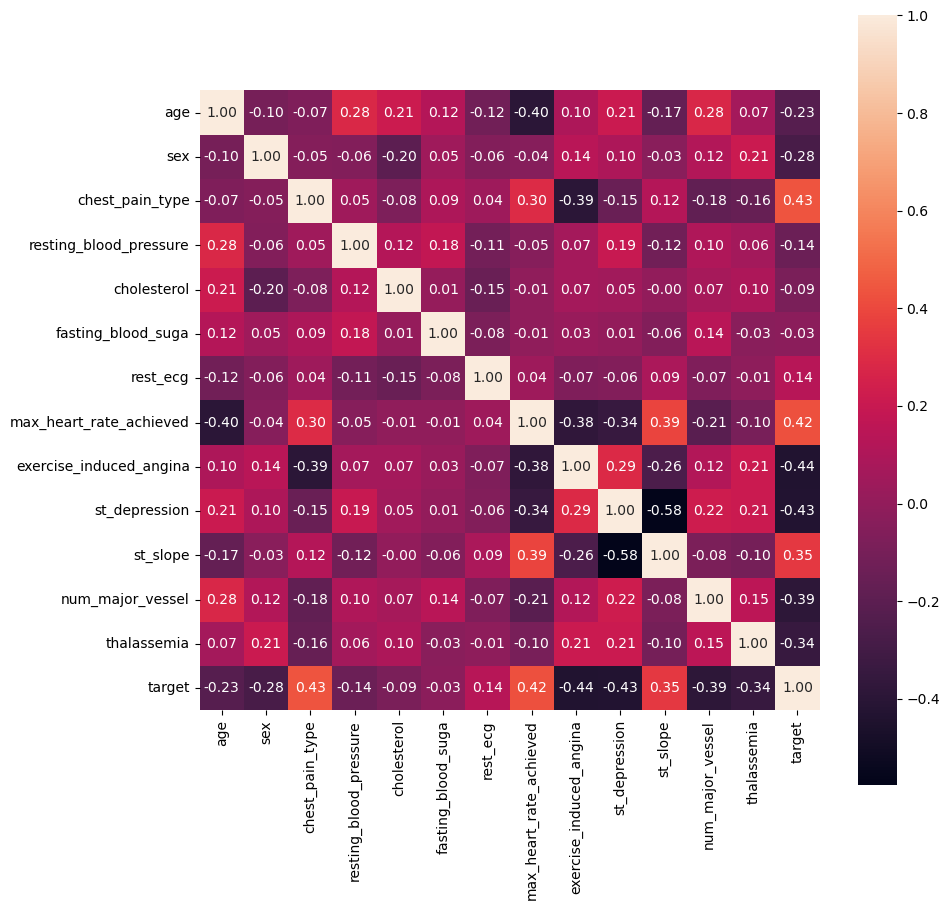

In [29]:
# correlation between SalePrice and other variables in the dataset 
plt.figure(figsize = (10, 10))
hm = sns.heatmap(df.corr(), cbar=True, annot = True, square=True, fmt ='.2f', annot_kws={'size':10});

In [30]:
df.corr()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_suga,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessel,thalassemia,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
chest_pain_type,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
resting_blood_pressure,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
cholesterol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fasting_blood_suga,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
rest_ecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
max_heart_rate_achieved,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exercise_induced_angina,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
st_depression,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


## Feature Engineering/Data Pre-processing

In [31]:
# Create a copy of the data(Exclusde target and label alongside other columns that was created)

df1 = df[['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_suga', 'rest_ecg', 'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessel', 'thalassemia']]

label = df[['target']]

In [32]:
df1

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_suga,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessel,thalassemia
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [33]:
df1.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_suga,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessel,thalassemia
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [34]:
label.head()

,target
0,1
1,1
2,1
3,1
4,1


In [35]:
df1.dtypes

age                          int64
sex                          int64
chest_pain_type              int64
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_suga           int64
rest_ecg                     int64
max_heart_rate_achieved      int64
exercise_induced_angina      int64
st_depression              float64
st_slope                     int64
num_major_vessel             int64
thalassemia                  int64
dtype: object

In [36]:
label.dtypes

target    int64
dtype: object

In [37]:
# Dealing with outliers - 'resting_blood_pressure', 'cholesterol', 'thalassemia', 'max_heart_rate_achieved'

# Normalise the data

scaler = MinMaxScaler()

df1['Scaled_RBP'] = scaler.fit_transform(df1['resting_blood_pressure'].values.reshape(-1, 1))
df1['Scaled_chol']= scaler.fit_transform(df1['cholesterol'].values.reshape(-1, 1))
df1['Scaled_Thal']= scaler.fit_transform(df1['thalassemia'].values.reshape(-1, 1))
df1['Scaled__max_heart_rate']= scaler.fit_transform(df1['max_heart_rate_achieved'].values.reshape(-1, 1))

df1.drop(['resting_blood_pressure', 'cholesterol', 'thalassemia', 'max_heart_rate_achieved'], axis = 1, inplace = True)

df1.head()

,age,sex,chest_pain_type,fasting_blood_suga,rest_ecg,exercise_induced_angina,st_depression,st_slope,num_major_vessel,Scaled_RBP,Scaled_chol,Scaled_Thal,Scaled__max_heart_rate
0,63,1,3,1,0,0,2.3,0,0,0.481132,0.244292,0.333333,0.603053
1,37,1,2,0,1,0,3.5,0,0,0.339623,0.283105,0.666667,0.885496
2,41,0,1,0,0,0,1.4,2,0,0.339623,0.178082,0.666667,0.770992
3,56,1,1,0,1,0,0.8,2,0,0.245283,0.251142,0.666667,0.816794
4,57,0,0,0,1,1,0.6,2,0,0.245283,0.520548,0.666667,0.702290


## Machine learning 

In [38]:
# Split the dataset into training and testing sets - X = Questions, y = Answers

X_train, X_test, y_train, y_test = train_test_split(df1, label, test_size = 0.2, random_state = 42)

In [39]:
# Model building 

# Logistic Regression 

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

ly_pred = logreg.predict(X_test)

print('Logistic Regression')
print('Accuracy:', accuracy_score(y_test, ly_pred))
print('Precision', precision_score(y_test, ly_pred))
print('Recall:', recall_score(y_test, ly_pred))
print('F1_score:', f1_score(y_test, ly_pred))
print('AUC-ROC:', roc_auc_score(y_test, ly_pred))

Logistic Regression
Accuracy: 0.8524590163934426
Precision 0.8709677419354839
Recall: 0.84375
F1_score: 0.8571428571428571
AUC-ROC: 0.8529094827586207


## NARRATION/OBSERVATIONS
- Accuracy: An accuracy of approximately 0.852 (85.24%) suggests that the model is correct in its predictions for about 85.24% of the data points.
- Precision: In this case, a precision of approximately 0.871 (87.1%) indicates that when the model predicts the positive class, it is correct about 87.1% of the time.
- Recall: A recall of approximately 0.844 (84.4%) suggests that the model is able to correctly identify about 84.4% of the actual positive instances.
- F1_score: An F1 score of approximately 0.857 (85.7%) is a balanced measure of the model's performance.
- AUC-ROC: An AUC-ROC of approximately 0.853 suggests that the model's ability to discriminate between classes is reasonably good.



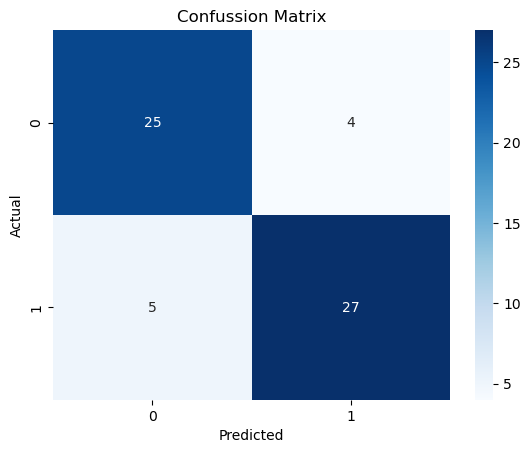

In [40]:
# Create a confusion matrix
lcm = confusion_matrix(y_test, ly_pred)

# Visualise the confusion matrix
sns.heatmap(lcm, annot = True, cmap = 'Blues', fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confussion Matrix')
plt.show()

In [41]:
# Model Building 
# Random Forest Classifier 

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfy_pred = rfc.predict(X_test)

print('Random Forest Classifier')
print('Accuracy:', accuracy_score(y_test, rfy_pred))
print('Precision', precision_score(y_test, rfy_pred))
print('Recall:', recall_score(y_test, rfy_pred))
print('F1_score:', f1_score(y_test, rfy_pred))
print('AUC-ROC:', roc_auc_score(y_test, rfy_pred))


Random Forest Classifier
Accuracy: 0.8360655737704918
Precision 0.84375
Recall: 0.84375
F1_score: 0.84375
AUC-ROC: 0.8356681034482758


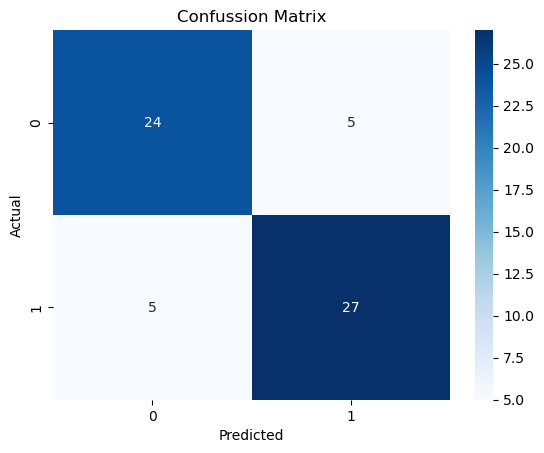

In [42]:
# Create a confusion matrix
rcm = confusion_matrix(y_test, rfy_pred)

# Visualise the confusion matrix
sns.heatmap(rcm, annot = True, cmap = 'Blues', fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confussion Matrix')
plt.show()

In [43]:
# 8 Machine learning Algorithms will be applied to the dataset

Classifiers = [[XGBClassifier(), 'XGB Classifier'],
               [RandomForestClassifier(), 'Random Forest'],
               [KNeighborsClassifier(), 'K-Nearest Neighbors'], 
               [SGDClassifier(), 'SGD Classifier ' ],[SVC(), 'SVC'], 
               [GaussianNB(), 'Naive Bayes'], 
               [DecisionTreeClassifier(random_state = 42), 'Decision Tree'], 
               [LogisticRegression(), 'LogisticRegression']
              ]

In [44]:
# Initialize empty dictionaries to store evaluation metrics for each classifier
acc_list = {}
precision_list = {}
recall_list = {}
roc_list = {}

# Iterate over a list of classifiers (Classifiers) where each classifier is a tuple containing a machine learning model and a model name.
for Classifier in Classifiers:
    model = Classifier[0]
    model.fit(X_train, y_train) # Fit the model with training data
    model_name = Classifier[1]  # Retrieve the model name from the tuple
    
    pred = model.predict(X_test) # Use the trained model to make predictions on the test data
    
    # Calculate the following evaluation metrics for the model's predictions
    a_score = accuracy_score(y_test, pred)
    p_score = precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    
    # Store the rounded evaluation scores in their respective dictionaries using the model name as the key
    acc_list[model_name] = [str(round(a_score * 100, 2)) + '%']
    precision_list[model_name] = [str(round(p_score * 100, 2)) + '%']
    recall_list[model_name] = [str(round(r_score * 100, 2)) + '%']
    roc_list[model_name] = [str(round(roc_score * 100, 2)) + '%']

    if model_name != Classifiers[-1][1]:
        print('')

In [50]:
print('Accuracy Score')
Sl = pd.DataFrame(acc_list)
Sl.head()

Accuracy Score


,XGB Classifier,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision Tree,LogisticRegression
0,81.97%,83.61%,75.41%,88.52%,65.57%,86.89%,85.25%,85.25%


In [52]:
print('Precision Score')
S2 = pd.DataFrame(precision_list)
S2.head()

Precision Score


,XGB Classifier,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision Tree,LogisticRegression
0,86.21%,84.38%,79.31%,87.88%,65.71%,90.0%,92.59%,87.1%


In [54]:
print('Recall')
S3 = pd.DataFrame(recall_list)
S3.head()

Recall


,XGB Classifier,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision Tree,LogisticRegression
0,78.12%,84.38%,71.88%,90.62%,71.88%,84.38%,78.12%,84.38%


In [56]:
print('ROC Score')
S4 = pd.DataFrame(roc_list)
S4.head()

ROC Score


,XGB Classifier,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision Tree,LogisticRegression
0,82.17%,83.57%,75.59%,88.42%,65.25%,87.02%,85.61%,85.29%
